<img src="spotify-logo.png" width=100 height=100 alt="Spotify Logo"> 

# Spotify Data Analysis
I am going to be analysing my own spotify data in this notebook. I have requested my extended streaming history from Spotify. It took around ~7 days to get all these data. You can do it to here at this link: <a href="https://support.spotify.com/us/article/data-rights-and-privacy-settings/?ref=related">Get Your Spotify Data</a>. 

In [119]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from api_key import API_KEY

First we need to read these data in and get them into a usable form. I decided to use a Pandas dataframe since all the tracks will have the same set of attributes. These attributes lend themselves well to column names.

In [5]:
with open("./data/StreamingHistory0.json") as f:
    # Spotify provides data in lots of different JSON files
    history = json.load(f)

In [15]:
df = pd.DataFrame(columns=["artistName", "trackName", "endTime", "secsPlayed"])
artists = []
tracks = []
endTimes = []
sPlayed = []
for trackItem in history:
    artists.append(trackItem["artistName"])
    tracks.append(trackItem["trackName"])
    endTimes.append(trackItem["endTime"])
    # Convert ms to seconds, most listening times should be on the order of seconds/mins
    sPlayed.append(trackItem["msPlayed"]/1E+3)

df["artistName"] = artists
df["trackName"] = tracks
df["endTime"] = endTimes
df["secsPlayed"] = sPlayed
# Check that everything looks reasonable
df.head()

,artistName,trackName,endTime,secsPlayed
0,Riton,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,2021-10-30 14:32,1.780
1,Oliver Heldens,Gecko (Overdrive) - Radio Edit,2021-11-01 07:20,165.440
2,Billie Eilish,you should see me in a crown,2021-11-01 07:23,180.952
3,Kendrick Lamar,King Kunta,2021-11-01 07:24,7.520
4,Robbie Williams,Rock DJ,2021-11-01 07:24,51.400


# Data Pre-processing
Currently our data types are a little strange, we should sort them out so they are easier to manipulate. It might also be useful to add some more columns into the dataframe, such as the number of times that track has been played. Then let's sort the dataframe by the total play time of the song!

In [39]:
# Convert the time strings to a datetime object
df["endTime"] = pd.to_datetime(df["endTime"])

# Count occurences of each song and add it as a new column
value_counts = df["trackName"].value_counts()
df["timesPlayed"] = [value_counts.loc[name] for name in df.trackName]

# Sort by the play count
df.sort_values(["timesPlayed"], axis=0, inplace=True, ascending=False)

df.head()

,artistName,trackName,endTime,secsPlayed,timesPlayed
584,Lincoln Grounds,Run Like Hell,2021-11-24 16:46:00,39.142,56
2600,Lincoln Grounds,Run Like Hell,2022-03-02 08:02:00,192.608,56
3633,Lincoln Grounds,Run Like Hell,2022-04-21 17:56:00,0.667,56
51,Lincoln Grounds,Run Like Hell,2021-11-03 07:37:00,193.046,56
1612,Lincoln Grounds,Run Like Hell,2021-12-27 08:17:00,192.608,56


# Basic Analysis
First lets group by the track and see the total play time, total number of plays and who the artist was and produce a ranking accordingly. That is, let's see my favourite songs I have played.

In [54]:
df_by_track = df.groupby("trackName")

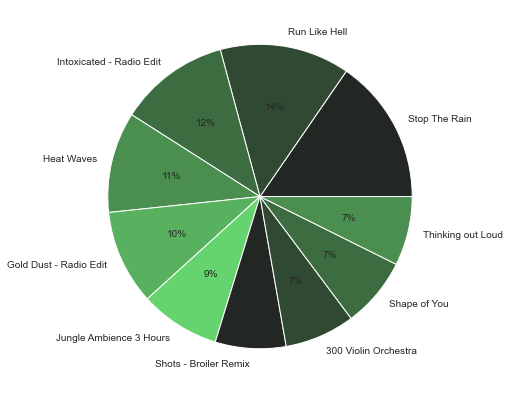

In [82]:
# Get my top 10 most listened to tracks, by total stream time
top_songs = df_by_track["secsPlayed"].sum().sort_values(ascending=False)[0:10]

# Scale the times down to 360 so it fits in a pie-chart nicely
cmap = sns.color_palette("dark:#65d46e", as_cmap=False)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.pie(top_songs, labels=top_songs.index, autopct='%.0f%%', colors=cmap)
plt.show()

/Users/chandler/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='secsPlayed', ylabel='artistName'>

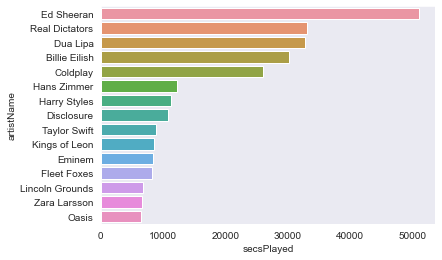

In [117]:
# What about my top 10 artists, let's look at total time played for these guys and plot them as a bar chart!
df_by_artist = df.groupby("artistName")
# Sum the total time played for each artist
playtime_vs_artist = df_by_artist["secsPlayed"].sum().sort_values(ascending=False)

sns.barplot(playtime_vs_artist[0:15], playtime_vs_artist.index[0:15])

In [127]:
df["endTime"].describe(datetime_is_numeric=True)

count                             5907
mean     2022-03-26 11:21:37.359065856
min                2021-10-30 14:32:00
25%                2021-12-22 11:42:30
50%                2022-03-10 05:10:00
75%                2022-05-26 06:56:00
max                2022-11-01 15:39:00
Name: endTime, dtype: object

In [121]:
resp = requests.get("https://api.spotify.com/v1/tracks/11dFghVXANMlKmJXsNCbNl?market=ES", headers={"Accept": "application/json", "Content-Type": "application/json", "Authorization": f"Bearer {API_KEY}"})

In [122]:
resp.text

'{\n  "album" : {\n    "album_type" : "single",\n    "artists" : [ {\n      "external_urls" : {\n        "spotify" : "https://open.spotify.com/artist/6sFIWsNpZYqfjUpaCgueju"\n      },\n      "href" : "https://api.spotify.com/v1/artists/6sFIWsNpZYqfjUpaCgueju",\n      "id" : "6sFIWsNpZYqfjUpaCgueju",\n      "name" : "Carly Rae Jepsen",\n      "type" : "artist",\n      "uri" : "spotify:artist:6sFIWsNpZYqfjUpaCgueju"\n    } ],\n    "external_urls" : {\n      "spotify" : "https://open.spotify.com/album/0tGPJ0bkWOUmH7MEOR77qc"\n    },\n    "href" : "https://api.spotify.com/v1/albums/0tGPJ0bkWOUmH7MEOR77qc",\n    "id" : "0tGPJ0bkWOUmH7MEOR77qc",\n    "images" : [ {\n      "height" : 64,\n      "url" : "https://i.scdn.co/image/ab67616d000048517359994525d219f64872d3b1",\n      "width" : 64\n    }, {\n      "height" : 300,\n      "url" : "https://i.scdn.co/image/ab67616d00001e027359994525d219f64872d3b1",\n      "width" : 300\n    }, {\n      "height" : 640,\n      "url" : "https://i.scdn.co/ima